<a href="https://colab.research.google.com/github/gagan3754/elevate-proj2/blob/main/elevate_proj_2_medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("KaggleV2-May-2016.csv")

# Identify missing values
missing_before = df.isnull().sum()
print(missing_before)


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64


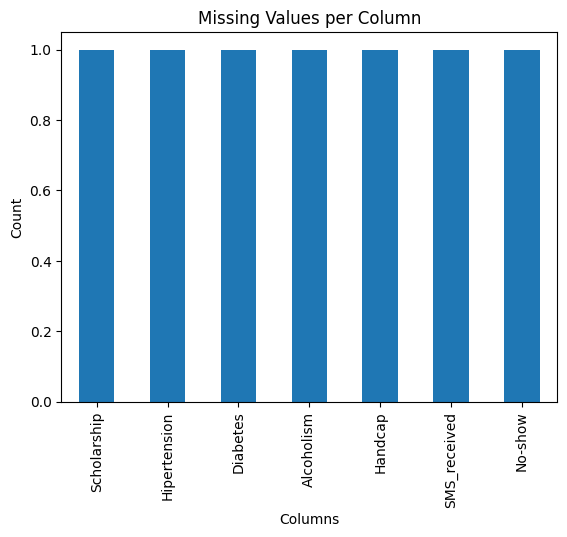

In [2]:
missing_plot = missing_before[missing_before > 0]

if not missing_plot.empty:
    missing_plot.plot(kind='bar')
    plt.title("Missing Values per Column")
    plt.ylabel("Count")
    plt.xlabel("Columns")
    plt.show()
else:
    print("No missing values found — bar chart not required.")


In [3]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-420811744.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [4]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3086599729.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [5]:
threshold = 0.4 * len(df)
cols_to_drop = df.columns[df.isnull().sum() > threshold]

df.drop(columns=cols_to_drop, inplace=True)

print("Columns removed:", list(cols_to_drop))


Columns removed: []


In [6]:
print("Missing values after cleaning:")
print(df.isnull().sum())

print("\nDataset Info:")
df.info()


Missing values after cleaning:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10785 entries, 0 to 10784
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       10785 non-null  float64
 1   AppointmentID   10785 non-null  int64  
 2   Gender          10785 non-null  object 
 3   ScheduledDay    10785 non-null  object 
 4   AppointmentDay  10785 non-null  object 
 5   Age             10785 non-null  int64  
 6   Neighbourhood   10785 non-null  object 
 7   Scholarship     10785 non-null  float64
 8   Hipertension    10785 non-null  float64
 9   Diabetes        10785 non-null  float64
 10  Alcohol

In [7]:
df_original = pd.read_csv("KaggleV2-May-2016.csv")

print("Before Cleaning:")
print("Shape:", df_original.shape)
print("Total Missing Values:", df_original.isnull().sum().sum())

print("\nAfter Cleaning:")
print("Shape:", df.shape)
print("Total Missing Values:", df.isnull().sum().sum())


Before Cleaning:
Shape: (64731, 14)
Total Missing Values: 6

After Cleaning:
Shape: (10785, 14)
Total Missing Values: 0
